In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [0]:
from tqdm.notebook import tqdm

In [0]:
def flat_dict(x):
    if len(x) == 0:
        return dict()
    return {k: np.asarray([e[k] for e in x]) for k in x[0].keys()}

In [0]:
from urllib.parse import urlparse
from urllib.request import urlretrieve
import os

def load_data(url, **kwargs):
    path = urlparse(url).path
    filename = os.path.basename(path)
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    return pd.read_csv(filename, **kwargs)

In [0]:
data = load_data('https://github.com/hse-aml/hadron-collider-machine-learning/releases/download/Week_2/training.csv.gz')

In [33]:
data.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,TrackQualitySubdetector2,FlagPrs,DLLelectron,DLLkaon,EcalE,TrackQualityPerNDoF,DLLproton,PrsDLLbeElectron,FlagRICH1,MuonLLbeBCK,FlagHcal,EcalShowerLongitudinalParameter,Calo2dFitQuality,TrackPt,TrackDistanceToZ,RICHpFlagPion,HcalDLLbeElectron,Calo3dFitQuality,FlagEcal,MuonLLbeMuon,TrackNDoFSubdetector1,RICHpFlagProton,RICHpFlagKaon,GhostProbability,TrackQualitySubdetector1,Label,RICH_DLLbeBCK,FlagRICH2,FlagBrem,HcalDLLbeMuon,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,17.585680,1.0,-6.411697,-7.213295,0.000001,1.467550,-26.667494,-2.730674,1.0,-5.152923,1.0,-999.000000,19.954819,3141.930677,0.613640,1.0,-0.909544,-999.000000,1.0,-0.661823,4.0,1.0,1.0,0.018913,5.366212,Muon,-21.913000,1.0,1.0,1.015345,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,20.230680,1.0,5.453014,0.000006,1531.542000,3.570540,-0.711194,1.773806,1.0,-999.000000,0.0,33.187644,0.037601,199.573653,0.465480,1.0,0.434909,13.667366,1.0,-999.000000,10.0,0.0,0.0,0.351206,9.144749,Ghost,-0.703617,0.0,1.0,-2.394644,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,11.619878,0.0,-999.000000,-999.000000,-999.000000,0.826442,-999.000000,-999.000000,0.0,-999.000000,0.0,-999.000000,-999.000000,94.829418,0.241891,0.0,-999.000000,-999.000000,0.0,-999.000000,5.0,0.0,0.0,0.195717,1.459992,Ghost,-999.000000,0.0,0.0,-999.000000,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,15.336305,1.0,-10.616585,-39.447507,4385.688000,1.076721,-29.291509,-3.053104,1.0,-999.000000,1.0,231.190351,2.839508,808.631064,0.680705,1.0,-1.504160,1939.259641,1.0,-999.000000,9.0,0.0,1.0,0.003972,22.950573,Pion,-47.223118,1.0,1.0,-0.321242,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,10.954629,1.0,-8.144945,26.050386,1220.930044,0.439767,21.386587,-2.730648,1.0,-999.000000,1.0,-794.866475,1.209193,1422.569214,0.575066,1.0,-1.576249,1867.165142,1.0,-999.000000,5.0,0.0,0.0,0.015232,3.516173,Proton,15.304688,0.0,1.0,-1.038026,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


In this programming assignment you will train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise. 

Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.

![pid](seminar5/pid.jpg)

### List of columns in the samples

Here, **Spd** stands for Scintillating Pad Detector, **Prs** - Preshower, **Ecal** - electromagnetic calorimeter, **Hcal** - hadronic calorimeter, **Brem** denotes traces of the particles that were deflected by detector.

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm.

Delta log-likelihood in the features descriptions means the difference between log-likelihood for the mass hypothesis that a given track is made by some particle (for example, electron) and log-likelihood for the mass hypothesis that a given track is produced by a pion (so, DLLpion = 0 and thus we don't have these columns). This is done since most tracks (~80%) are left by pions and in practice we actually need to discriminate other particles from pions. In other words, the null hypothesis is that particle is a pion.

![features](seminar5/features.jpeg)

In [34]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(data.Label)
y = le.transform(data.Label).astype(np.float)
print(y)

[3. 1. 1. ... 4. 3. 4.]


In [35]:
labels = np.array(le.classes_, dtype=np.str)
labels

array(['Electron', 'Ghost', 'Kaon', 'Muon', 'Pion', 'Proton'], dtype='<U8')

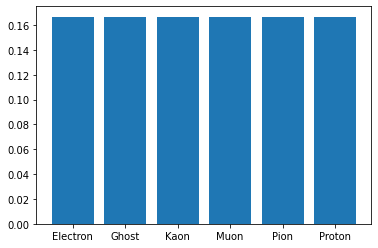

In [36]:
count = np.array([(data.Label == l).sum() for l in labels])
plt.bar(np.arange(len(labels)), count / np.sum(count))
plt.xticks(np.arange(len(labels)), labels)
plt.show()

In [37]:
features = np.asarray(list(set(data.columns) - {'Label',}))

x = np.asarray(data[features])
print(x.shape)

(1200000, 49)


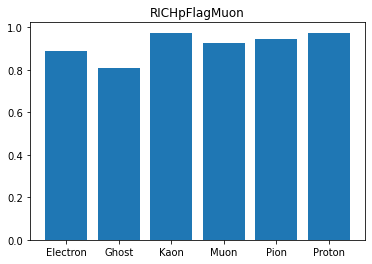

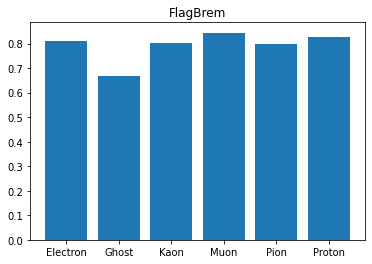

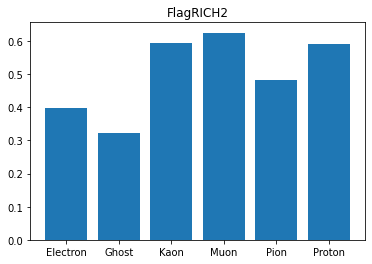

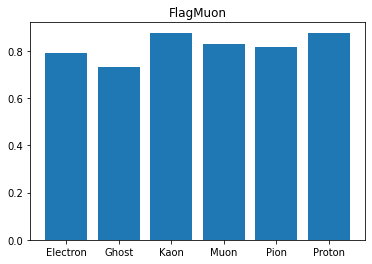

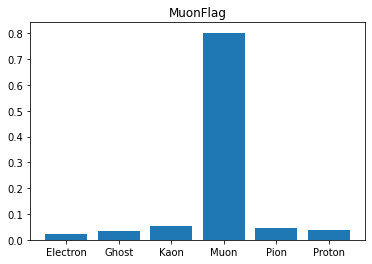

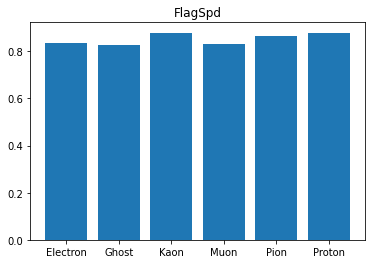

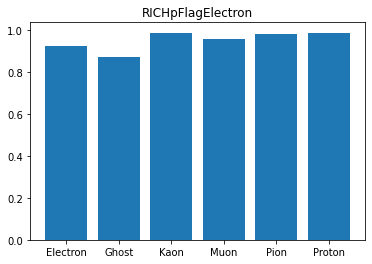

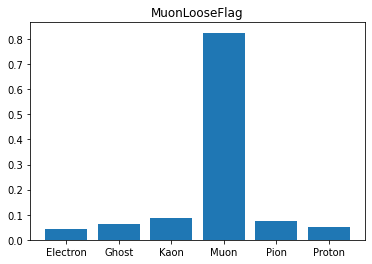

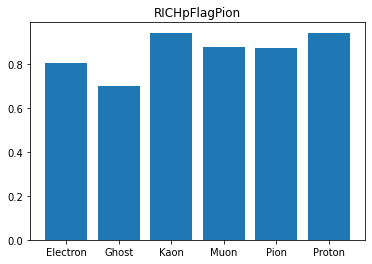

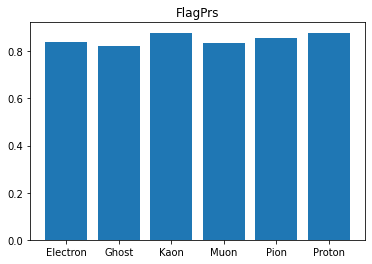

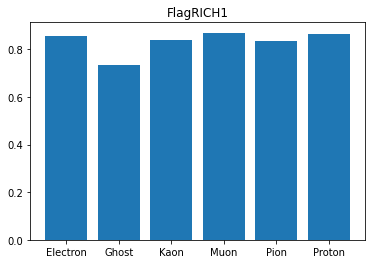

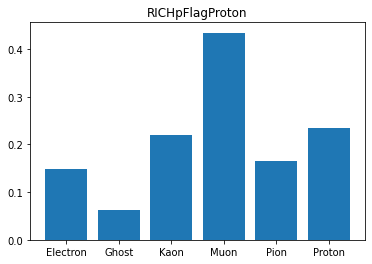

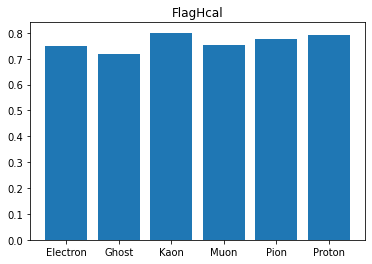

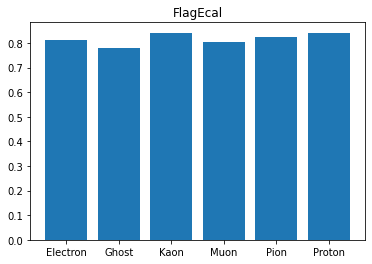

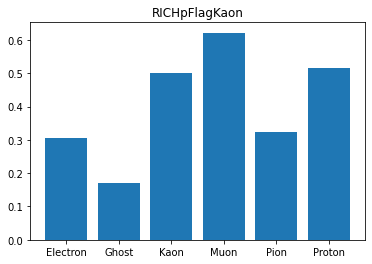

In [38]:
for s in features:
    if s.find("Flag") < 0:
        continue
    plt.figure()
    ratio = np.array([data[data.Label == l][s].sum() for l in labels]) / count
    plt.title(s)
    plt.bar(np.arange(len(labels)), ratio)
    plt.xticks(np.arange(len(labels)), labels)
    plt.show()

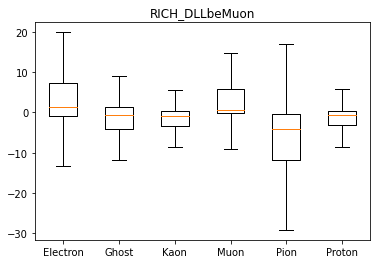

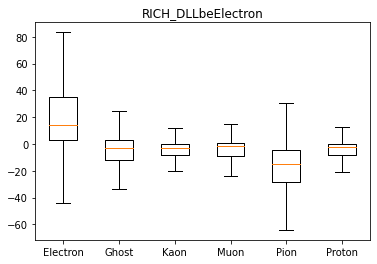

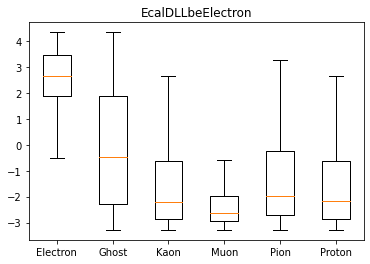

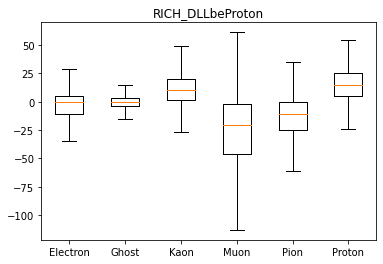

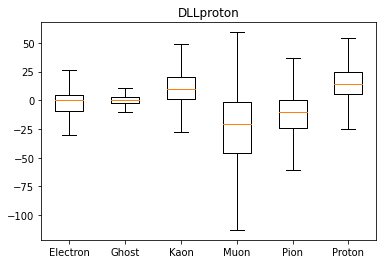

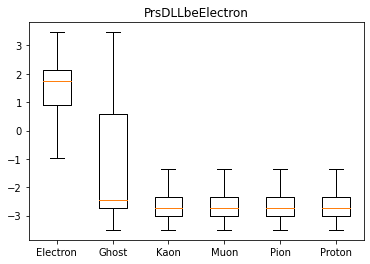

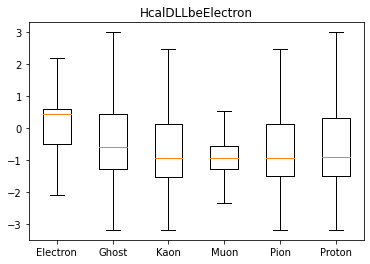

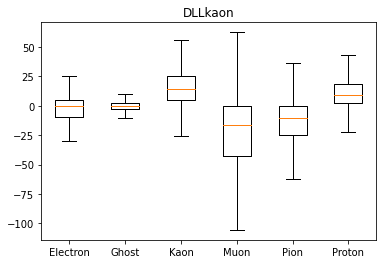

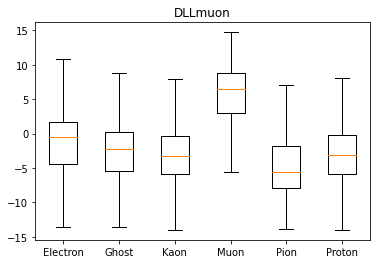

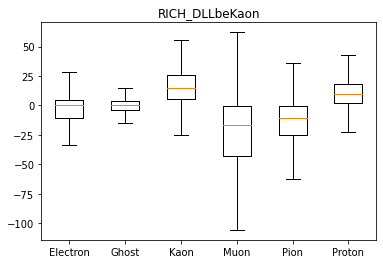

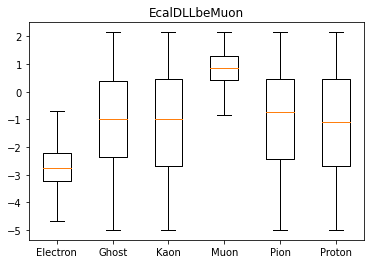

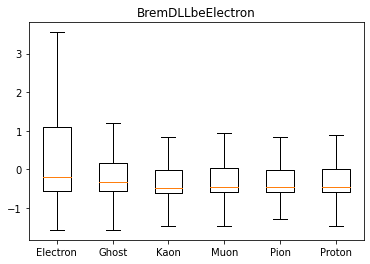

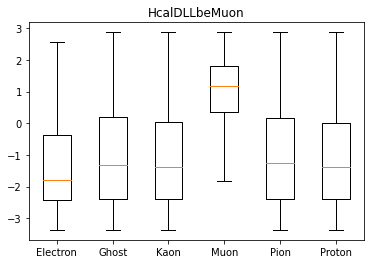

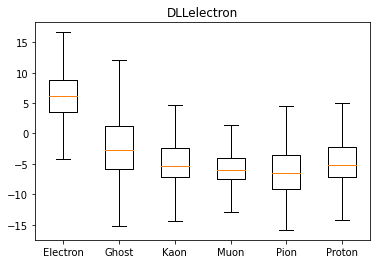

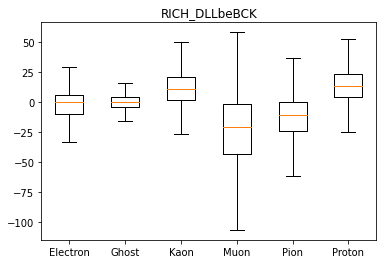

In [39]:
for s in features:
    if s.find("DLL") < 0:
        continue
    plt.figure()
    dll = list([data[data.Label == l][s] for l in labels])
    dll = list([x[x > -998] for x in dll])
    plt.title(s)
    plt.boxplot(dll, showfliers=False)
    plt.xticks(np.arange(len(labels))+1, labels)
    plt.show()

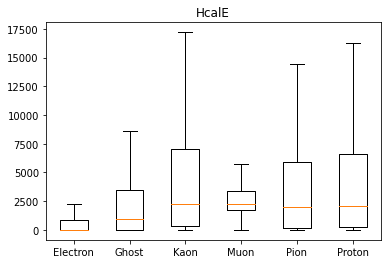

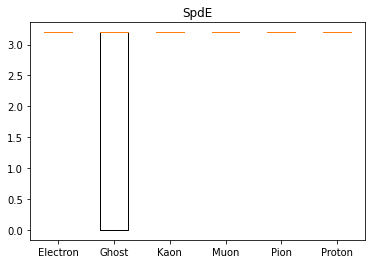

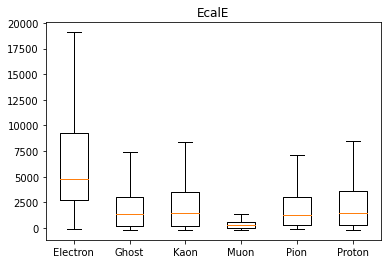

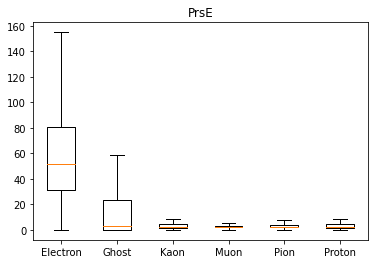

In [40]:
import re

for s in features:
    if not re.match(r'(.*?)E$', s):
        continue
    plt.figure()
    e = list([data[data.Label == l][s] for l in labels])
    e = list([x[x > -998] for x in e])
    plt.title(s)
    plt.boxplot(e, showfliers=False)
    plt.xticks(np.arange(len(labels))+1, labels)
    plt.show()

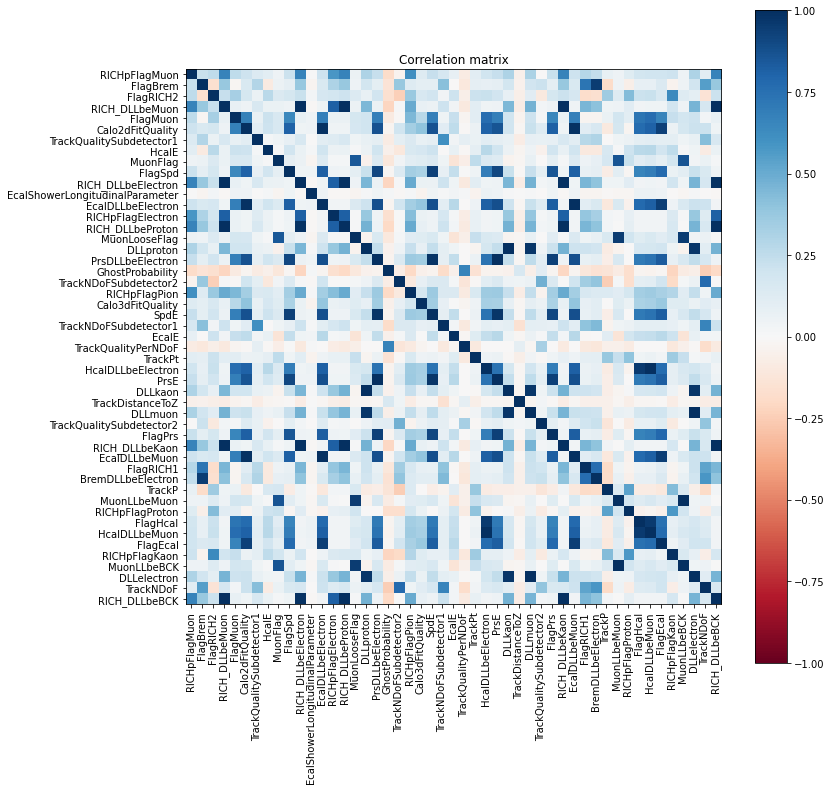

In [41]:
x_cov = np.cov(x.T)
sigma = np.sqrt(np.diag(x_cov))
x_cor = x_cov / np.outer(sigma, sigma)

plt.figure(figsize=(12, 12))
vmax = 1.0
plt.imshow(x_cor, interpolation='nearest', vmin=-vmax, vmax=vmax, cmap=plt.cm.RdBu)
plt.title("Correlation matrix")
plt.colorbar()
plt.yticks(np.arange(len(features)), features)
plt.xticks(rotation=90)
_ = plt.xticks(np.arange(len(features)), features)

In [42]:
from sklearn.decomposition import PCA

for l, label in enumerate(labels):
    pca = PCA(1)
    
    subset = (y == l)
    
    pca.fit(x[subset])
    f = features[np.abs(pca.components_[0]).argsort()[-5:]]

    npca = PCA(1)
    npca.fit(x[~subset])
    nf = features[np.abs(npca.components_[0]).argsort()[-5:]]
    
    print(pca.components_[0])
    print("{}".format(label))
    print(np.vstack([f,nf]).T)
    print()

[ 1.84370712e-06 -2.29221114e-06  1.06876091e-05  8.77860224e-04
  3.36293728e-06  5.26163601e-04  7.43064122e-06  2.70124650e-02
 -2.98556723e-07  9.91562442e-07  5.49255473e-04  1.07492541e-03
  5.50916867e-04  7.18009673e-07  5.56307702e-04 -4.81055672e-07
 -4.10283606e-04  9.52217761e-04 -2.13130152e-07 -4.47032692e-05
  4.16840833e-06  5.25924797e-04  9.94873863e-04 -3.14854764e-06
  2.41282330e-01  9.13729746e-07  2.91513663e-02  1.12370345e-03
  1.83535066e-03 -3.22687008e-04 -1.38676764e-06 -7.01500476e-05
 -3.13194743e-05  9.12628309e-07  6.43206397e-04  5.20602151e-04
 -2.32121725e-06 -2.50403639e-03  9.69630879e-01 -5.16880676e-04
  1.09640688e-05  1.03222486e-06  1.13702280e-03  4.87581182e-07
  1.19508726e-05 -5.16735209e-04 -8.89499347e-05 -5.14250557e-05
  5.69306449e-04]
Electron
[['BremDLLbeElectron' 'EcalShowerLongitudinalParameter']
 ['HcalE' 'EcalE']
 ['TrackPt' 'TrackPt']
 ['EcalE' 'HcalE']
 ['TrackP' 'TrackP']]

[ 4.61758737e-06 -2.48459396e-06  1.57014469e-05  3.

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

## Один против всех

**Задание 5.1** Для каждой из частиц решите задачу бинарной классификации "один против всех" с помощью логистической регрессии (используйте готовый класс `LogisticRegression` из пакета `sklearn`).
Используя тестовый набор данных, постройте график ROC и определите для него AUC для каждой из частиц.

In [0]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegression

roc = {}
auc = {}
for l, label in enumerate(tqdm(labels)):
    one_y_train = (y_train == l).astype(np.float) #
    one_y_test = (y_test == l).astype(np.float) #
    
    c = LogisticRegression(max_iter=200, n_jobs=-1)
    c.fit(x_train, one_y_train)
    
    y_pred = c.predict(x_test) #
    scores = c.decision_function(x_test) #
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, scores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, scores)

100%|██████████| 6/6 [24:27<00:00, 244.57s/it]


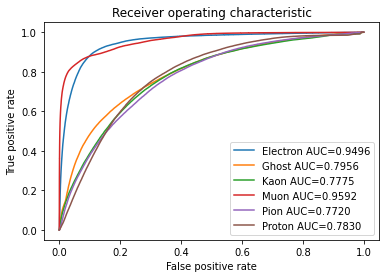

In [0]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

**Задание 5.2** Для каждой из частиц решите задачу бинарной классификации "один против всех" с помощью метода случайного леса (используйте готовый класс `RandomForestClassifier` из пакета `sklearn`). В этом задании используя метод кросс-валидации и набор данных для обучения, подберите оптимальные гиперпараметры для метода случайного леса.

В коде ниже предлагается варьировать число деревьев в лесу и максимальную глубину дерева, вы можете выбирать другие гиперпараметры на своё усмотрение.

Для каждого набора гиперпараметров распечатайте и сравние AUC и время обучения.

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.multiclass import OneVsRestClassifier
from tqdm.notebook import tqdm

In [0]:
print(x.shape)
print(y.shape)
one_y = (y == l).astype(np.float)
print(one_y[:10])

(1200000, 49)
(1200000,)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]


In [0]:
max_depths = [6, 7] #
n_estimatorss = [100, 125]
hparam = np.array(np.meshgrid(max_depths, n_estimatorss)).reshape(2, -1).T

scoring = {
    "auc":       "roc_auc",
}

for l, label in enumerate(labels):
    one_y = np.asarray((y == l).astype(np.float))

    scores = []
    for max_depth, n_estimators in tqdm(hparam):
        c = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
        ova = OneVsRestClassifier(c, n_jobs=-1)
        s = cross_validate(ova, x, one_y.reshape(-1), cv=3, scoring=scoring, return_train_score=True)
        scores.append(s)
    
    scores = flat_dict(scores)
    auc = np.hstack([scores['test_auc'].mean(axis=1).reshape(-1,1), hparam, scores['fit_time'].mean(axis=1).reshape(-1,1)])
    
    print("Class {}".format(label))
    print(auc[auc[:,0].argsort()])

  0%|          | 0/4 [00:00<?, ?it/s]

Class Electron
[[  0.97981029   6.         100.         206.048129  ]
 [  0.97995007   6.         125.         257.71042418]
 [  0.98182344   7.         125.         287.24146565]
 [  0.9818317    7.         100.         230.07711808]]


  0%|          | 0/4 [00:00<?, ?it/s]

Class Ghost
[[  0.94361631   6.         125.         257.23943822]
 [  0.94381218   6.         100.         210.25264915]
 [  0.94666787   7.         125.         297.97193178]
 [  0.94692792   7.         100.         242.40950839]]


  0%|          | 0/4 [00:00<?, ?it/s]

Class Kaon
[[  0.89260559   6.         125.         251.44843332]
 [  0.89314184   6.         100.         211.41125178]
 [  0.89908455   7.         100.         241.36457745]
 [  0.89955897   7.         125.         289.28155486]]


  0%|          | 0/4 [00:00<?, ?it/s]

Class Muon
[[  0.98497022   6.         125.         262.06752539]
 [  0.98498978   6.         100.         208.79070934]
 [  0.98693259   7.         125.         288.13980063]
 [  0.98699109   7.         100.         243.63783805]]


 75%|███████▌  | 3/4 [36:00<11:43, 703.68s/it]

## Вывод
- Были проверены различные параметры леса: глубина и количество деревьев. Оптимальными оказались `max_depth = 7` и `n_estimators = 100 - 125` для разных классов частиц. Дальнейшее "углубление" или большее количество деревьев не дают весомого улучшения __AUC__ за разумное время

- Необходима более мощная аппаратная конфигурация машины - ноутбук не подходит для таких целей!

**Задание 5.3** Используя гиперпараметры, найденные в предыдущем задании, и метод случайного леса, решите задачу бинарной классификации ("один против всех") для каждой из частиц. Аналогично заданию 5.1, используя тестовый набор данных, постройте график ROC и определите AUC для каждой из частиц.

In [0]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'Muon' : {
        'n_estimators': 125,
        'max_depth': 7,
    },
    'Ghost' : {
        'n_estimators': 125,
        'max_depth': 7,
    },
    'Kaon' : {
        'n_estimators': 100,
        'max_depth': 7,
    },
    'Electron': {
        'n_estimators': 100,
        'max_depth': 7,
    },
    'Pion' : {
        'n_estimators': 100,
        'max_depth': 7,
    },
    'Proton' : {
        'n_estimators': 125,
        'max_depth': 7,
    },
}

In [0]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics


roc = {}
auc = {}
for l, label in enumerate(tqdm(labels)):
    one_y_train = (y_train == l).astype(np.float) #
    one_y_test = (y_test == l).astype(np.float) #
    
    c = RandomForestClassifier(n_jobs=-1, **params[label])
    c.fit(x_train, one_y_train)
    
    y_pred = c.predict(x_test) #
    scores = c.predict_proba(x_test)[:,1] #
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, scores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, scores)

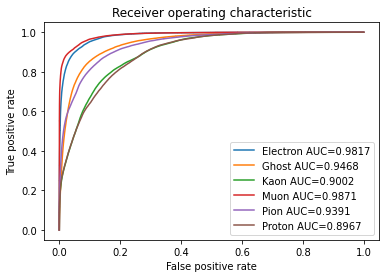

In [0]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

## Многоклассовый классификатор

**Задание 5.4** Решите задачу многоклассовой классификации для всех частиц сразу с помощью метода случайного леса (используйте готовый класс `RandomForestClassifier` из пакета `sklearn`). В этом задании используя метод кросс-валидации и набор данных для обучения, подберите оптимальные гиперпараметры для метода случайного леса.

В коде ниже предлагается варьировать число деревьев в лесу и максимальную глубину дерева, вы можете выбирать другие гиперпараметры на своё усмотрение.

Для каждого набора гиперпараметров распечатайте и сравние значения точности (accuracy), кросс-энтропии (логарифм потерь), и времени обучения.

In [0]:
max_depths = np.arange(6, 8) 
n_estimatorss = np.arange(100, 150, 25)
hparam = np.array(np.meshgrid(max_depths, n_estimatorss)).reshape(2, -1).T

scoring = {
    "accuracy": "accuracy",
    "log_loss": "neg_log_loss",
}

scores = []
for max_depth, n_estimators in tqdm(hparam):
    c = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
    s = cross_validate(c, x, y.reshape(-1), cv=5, scoring=scoring, return_train_score=True)
    scores.append(s)

In [0]:
scores = flat_dict(scores)

In [0]:
log_loss = np.hstack([scores['test_log_loss'].mean(axis=1).reshape(-1,1), scores['test_accuracy'].mean(axis=1).reshape(-1,1), hparam, scores['fit_time'].mean(axis=1).reshape(-1,1)])
print(log_loss[log_loss[:,0].argsort()])

[[ -0.8492549    0.70689583   6.         125.         371.58799319]
 [ -0.84822221   0.70837      6.         100.         304.17450824]
 [ -0.80295857   0.71420917   7.         100.         340.30581245]
 [ -0.80284152   0.71417      7.         125.         395.141675  ]]


**Задание 5.5** Используя гиперпараметры найденные в задании 5.4, и метод случайного леса, решите задачу многоклассовой классификации для всех частиц сразу. Аналогично заданию 5.1, используя тестовый набор данных, постройте график ROC и определите AUC для каждой из частиц.
Рассчитайте матрицу ошибок $6 \times 6$ для всех классов.

In [0]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics

c = RandomForestClassifier(n_jobs=-1, max_depth=7, n_estimators=100)
c.fit(x_train, y_train.reshape(-1))

scores = c.predict_proba(x_test)

roc = {}
auc = {}
for l, label in enumerate(tqdm(labels)):
    lscores = scores[:, l]
    one_y_test = (y_test == l).astype(np.float)
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

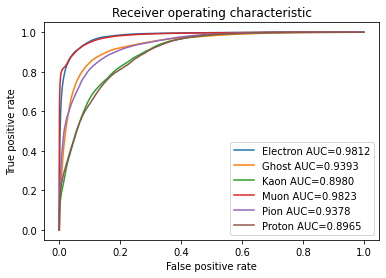

In [0]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

              precision    recall  f1-score   support

    Electron       0.85      0.86      0.85     49983
       Ghost       0.72      0.74      0.73     49964
        Kaon       0.63      0.51      0.56     49901
        Muon       0.92      0.82      0.87     50344
        Pion       0.60      0.81      0.69     49894
      Proton       0.61      0.55      0.58     49914

    accuracy                           0.71    300000
   macro avg       0.72      0.71      0.71    300000
weighted avg       0.72      0.71      0.71    300000



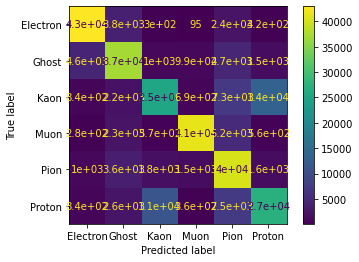

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = y_test
y_pred = c.predict(x_test)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()

**Задание 5.6** Решите задачу многоклассовой классификации для всех частиц сразу с помощью метода градиентного бустинга (используйте готовый класс `XGBClassifier` из пакета `xgboost`). В этом задании используя метод кросс-валидации и набор данных для обучения, подберите оптимальные гиперпараметры для метода градиентного бустинга.

В коде ниже предлагается варьировать число шагов бустинга (число деревьев) и максимальную глубину дерева, вы можете выбирать другие гиперпараметры на своё усмотрение.

Для каждого набора гиперпараметров распечатайте и сравние значения точности (accuracy), кросс-энтропии (логарифм потерь), и времени обучения.

In [0]:
!pip install xgboost

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

max_depths = 6
n_estimatorss = 100
hparam = np.array(np.meshgrid(max_depths, n_estimatorss)).reshape(2, -1).T

scoring = {
    "accuracy": "accuracy",
    "log_loss": "neg_log_loss",
}

scores = []
for max_depth, n_estimators in tqdm(hparam):
    c = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)
    s = cross_validate(c, x, y.reshape(-1), cv=5, scoring=scoring, return_train_score=True)
    scores.append(s)

In [0]:
scores = flat_dict(scores)

In [0]:
log_loss = np.hstack([scores['test_log_loss'].mean(axis=1).reshape(-1,1), scores['test_accuracy'].mean(axis=1).reshape(-1,1), hparam, scores['fit_time'].mean(axis=1).reshape(-1,1)])
print(log_loss[log_loss[:,0].argsort()])

[[-5.92016967e-01  7.60597500e-01  6.00000000e+00  1.00000000e+02
   4.17540566e+03]]


In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

max_depths = 7
n_estimatorss = 125
hparam = np.array(np.meshgrid(max_depths, n_estimatorss)).reshape(2, -1).T

scoring = {
    "accuracy": "accuracy",
    "log_loss": "neg_log_loss",
}

scores = []
for max_depth, n_estimators in tqdm(hparam):
    c = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)
    s = cross_validate(c, x, y.reshape(-1), cv=5, scoring=scoring, return_train_score=True)
    scores.append(s)


scores = flat_dict(scores)

KeyboardInterrupt: ignored

In [0]:
log_loss = np.hstack([scores['test_log_loss'].mean(axis=1).reshape(-1,1), scores['test_accuracy'].mean(axis=1).reshape(-1,1), hparam, scores['fit_time'].mean(axis=1).reshape(-1,1)])
print(log_loss[log_loss[:,0].argsort()])

In [0]:
max_depths = 6
n_estimatorss = 125
hparam = np.array(np.meshgrid(max_depths, n_estimatorss)).reshape(2, -1).T

scoring = {
    "accuracy": "accuracy",
    "log_loss": "neg_log_loss",
}

scores = []
for max_depth, n_estimators in tqdm(hparam):
    c = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)
    s = cross_validate(c, x, y.reshape(-1), cv=5, scoring=scoring, return_train_score=True)
    scores.append(s)


scores = flat_dict(scores)

In [0]:
log_loss = np.hstack([scores['test_log_loss'].mean(axis=1).reshape(-1,1), scores['test_accuracy'].mean(axis=1).reshape(-1,1), hparam, scores['fit_time'].mean(axis=1).reshape(-1,1)])
print(log_loss[log_loss[:,0].argsort()])

In [0]:
max_depths = 7
n_estimatorss = 125
hparam = np.array(np.meshgrid(max_depths, n_estimatorss)).reshape(2, -1).T

scoring = {
    "accuracy": "accuracy",
    "log_loss": "neg_log_loss",
}

scores = []
for max_depth, n_estimators in tqdm(hparam):
    c = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators)
    s = cross_validate(c, x, y.reshape(-1), cv=5, scoring=scoring, return_train_score=True)
    scores.append(s)


scores = flat_dict(scores)

In [0]:
log_loss = np.hstack([scores['test_log_loss'].mean(axis=1).reshape(-1,1), scores['test_accuracy'].mean(axis=1).reshape(-1,1), hparam, scores['fit_time'].mean(axis=1).reshape(-1,1)])
print(log_loss[log_loss[:,0].argsort()])

### "Честным" способом не получается подобрать оптимальные параметры: очень долго, столько времени нет. Имеет смысл попробовать вручную подобрать

**Задание 5.7** Используя гиперпараметры найденные в задании 5.6, и метод градиентного бустинга, решите задачу многоклассовой классификации для всех частиц сразу. Аналогично заданию 5.5, используя тестовый набор данных, постройте график ROC и определите AUC для каждой из частиц.
Рассчитайте матрицу ошибок $6 \times 6$ для всех классов.

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score


c = XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=100)
c.fit(x_train, y_train.reshape(-1))

scores = c.predict_proba(x_test)

In [0]:
import sklearn.metrics
roc = {}
auc = {}
for l, label in enumerate(labels):
    lscores = scores[:, l]
    one_y_test = (y_test == l).astype(np.float)
    
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

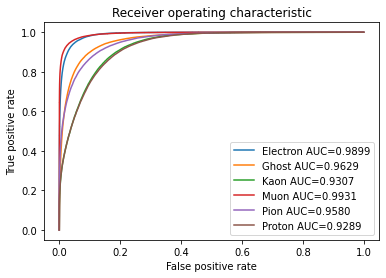

In [49]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

              precision    recall  f1-score   support

    Electron       0.88      0.88      0.88     49983
       Ghost       0.75      0.80      0.77     49964
        Kaon       0.65      0.62      0.64     49901
        Muon       0.91      0.91      0.91     50344
        Pion       0.71      0.79      0.75     49894
      Proton       0.67      0.58      0.62     49914

    accuracy                           0.77    300000
   macro avg       0.76      0.77      0.76    300000
weighted avg       0.76      0.77      0.76    300000



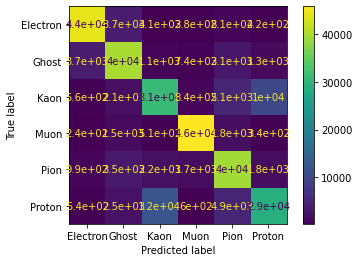

In [50]:

y_true = y_test
y_pred = c.predict(x_test)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()

## Будь чуть больше времени, можно было бы попробовать поискать более оптимальные параметры. К сожалению, уже не успеваю

**Задание 5.8** Используя готовый фреймворк для нейронных сетей, решите задачу многоклассовой классификации с помощью нейросети. Придумайте архитектуру самостоятельно и подберите оптимальные её параметры. В качестве функции потерь для задачи многоклассовой классификации уместно использовать функцию кросс-энтропии. Аналогично заданию 5.5, используя тестовый набор данных, постройте график ROC и определите AUC для каждой из частиц. Рассчитайте матрицу ошибок $6 \times 6$ для всех классов.

В приведенном примере используется `tensorflow`, однако, вы можете решать задание и с помощью пакета `torch`.

In [0]:
import tensorflow as tf

In [56]:
tf.random.set_seed(43)

INPUT_DIM  = x_train.shape[1]
HIDDEN_DIM1 = 500
HIDDEN_DIM2 = 500
OUTPUT_DIM = len(labels)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(HIDDEN_DIM1, activation="sigmoid"),
    tf.keras.layers.Dense(HIDDEN_DIM2, activation="sigmoid"),
    tf.keras.layers.Dense(OUTPUT_DIM, activation="softmax"),
])

learning_rate = 1e-3
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, tf.keras.utils.to_categorical(y_train, num_classes=len(labels)),
          epochs=30, batch_size=12,
          validation_data=(x_test, tf.keras.utils.to_categorical(y_test, num_classes=len(labels)))
         )

Epoch 1/30
75000/75000 [==============================] - 266s 4ms/step - loss: 1.1781 - accuracy: 0.5026 - val_loss: 1.0954 - val_accuracy: 0.5425
Epoch 2/30
75000/75000 [==============================] - 266s 4ms/step - loss: 1.0819 - accuracy: 0.5396 - val_loss: 1.0676 - val_accuracy: 0.5478
Epoch 3/30
75000/75000 [==============================] - 272s 4ms/step - loss: 1.0525 - accuracy: 0.5504 - val_loss: 1.0323 - val_accuracy: 0.5560
Epoch 4/30
75000/75000 [==============================] - 271s 4ms/step - loss: 1.0462 - accuracy: 0.5533 - val_loss: 1.0471 - val_accuracy: 0.5633
Epoch 5/30
75000/75000 [==============================] - 275s 4ms/step - loss: 1.0340 - accuracy: 0.5581 - val_loss: 1.0425 - val_accuracy: 0.5532
Epoch 6/30
75000/75000 [==============================] - 266s 4ms/step - loss: 1.0264 - accuracy: 0.5604 - val_loss: 1.0237 - val_accuracy: 0.5565
Epoch 7/30
75000/75000 [==============================] - 265s 4ms/step - loss: 1.0219 - accuracy: 0.5617 - val_

In [0]:
scores = model.predict(x_test)

roc = {}
auc = {}
for l, label in enumerate(labels):  
    fpr, tpr, _ = sklearn.metrics.roc_curve(one_y_test, lscores)
    roc[l] = {"tpr": tpr, "fpr": fpr}
    auc[l] = sklearn.metrics.roc_auc_score(one_y_test, lscores)

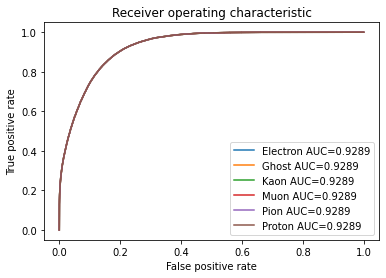

In [58]:
plt.figure()
plt.title("Receiver operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
for l, label in enumerate(labels):
    plt.plot(roc[l]['fpr'], roc[l]['tpr'], label='{} AUC={:.4f}'.format(label, auc[l]))
_ = plt.legend(loc='lower right')

              precision    recall  f1-score   support

    Electron       0.75      0.82      0.79     49983
       Ghost       0.55      0.26      0.36     49964
        Kaon       0.47      0.00      0.00     49901
        Muon       0.66      0.88      0.76     50344
        Pion       0.67      0.49      0.57     49894
      Proton       0.36      0.85      0.51     49914

    accuracy                           0.55    300000
   macro avg       0.58      0.55      0.50    300000
weighted avg       0.58      0.55      0.50    300000



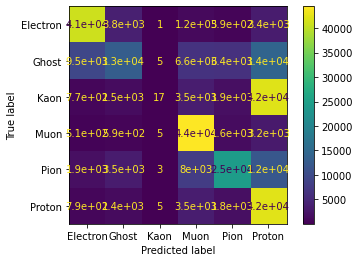

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

y_true = y_test
y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_true, y_pred, target_names=labels))

cm = confusion_matrix(y_true, y_pred)

cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
_ = cmd.plot()